In [ ]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet
import timeit

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np

In [ ]:
import io
import pandas as pd
from google.colab import files

uploaded = files.upload()

df = pd.read_excel(io.BytesIO(uploaded.get('UPT.xlsx')))

Saving UPT.xlsx to UPT.xlsx


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
df

,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,UZA Name,Modes,TOS,JAN02,...,MAY21,JUN21,JUL21,AUG21,SEP21,OCT21,NOV21,DEC21,JAN22,FEB22
0,1.0,1,King County Department of Metro Transit,Active,Full Reporter,14.0,"Seattle, WA",DR,PT,135144.0,...,3.633100e+04,4.192100e+04,4.313500e+04,4.380100e+04,4.315300e+04,4.467600e+04,4.390100e+04,4.001800e+04,4.060000e+04,4.273800e+04
1,1.0,1,King County Department of Metro Transit,Active,Full Reporter,14.0,"Seattle, WA",DR,TX,NaN,...,8.177000e+03,4.321000e+03,6.679000e+03,7.723000e+03,8.765000e+03,1.082700e+04,9.716000e+03,7.962000e+03,6.469000e+03,7.298000e+03
2,1.0,1,King County Department of Metro Transit,Active,Full Reporter,14.0,"Seattle, WA",FB,DO,NaN,...,2.612100e+04,3.429200e+04,5.212900e+04,4.475900e+04,3.347900e+04,2.750500e+04,2.004700e+04,1.729300e+04,1.505000e+04,1.831700e+04
3,1.0,1,King County Department of Metro Transit,Inactive,Full Reporter,14.0,"Seattle, WA",LR,DO,12990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1,King County Department of Metro Transit,Active,Full Reporter,14.0,"Seattle, WA",MB,DO,6045861.0,...,3.331400e+06,3.583180e+06,3.853296e+06,3.837242e+06,3.998616e+06,4.452242e+06,3.948846e+06,3.422080e+06,3.491550e+06,3.479746e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,NaN,NaN,NaN,NaN,NaN,NaN,Rolling 12-Month Sum,NaN,NaN,NaN,...,3.682729e+09,3.838513e+09,3.953770e+09,4.062938e+09,4.196131e+09,4.344375e+09,4.500174e+09,4.639609e+09,4.728589e+09,4.863253e+09
2259,NaN,NaN,NaN,NaN,NaN,NaN,Reduced Reporters,NaN,NaN,NaN,...,6.086490e+07,6.086490e+07,6.086490e+07,6.086490e+07,6.086490e+07,6.086490e+07,6.086490e+07,6.086490e+07,6.086490e+07,6.086490e+07
2260,NaN,NaN,NaN,NaN,NaN,NaN,Rolling 12-Month Sum with Reduced Reporters,NaN,NaN,NaN,...,3.743594e+09,3.899378e+09,4.014635e+09,4.123803e+09,4.256995e+09,4.405239e+09,4.561039e+09,4.700474e+09,4.789454e+09,4.924118e+09
2261,NaN,NaN,NaN,NaN,NaN,NaN,Rural Reporters,NaN,NaN,NaN,...,9.508546e+07,9.508546e+07,9.508546e+07,9.508546e+07,9.508546e+07,9.508546e+07,9.508546e+07,9.508546e+07,9.508546e+07,9.508546e+07


In [ ]:
# Group by NTD ID
ntd = df.groupby('5 digit NTD ID').sum()
ntd = ntd.drop(columns=['UZA'])
ntd

,JAN02,FEB02,MAR02,APR02,MAY02,JUN02,JUL02,AUG02,SEP02,OCT02,...,MAY21,JUN21,JUL21,AUG21,SEP21,OCT21,NOV21,DEC21,JAN22,FEB22
5 digit NTD ID,,,,,,,,,,,,,,,,,,,,,
1.0,8412850.0,7540097.0,8366395.0,8422732.0,8542794.0,7898042.0,8303314.0,8368743.0,7759440.0,8349316.0,...,4148694.0,4458771.0,4877298.0,4854160.0,5062069.0,5521458.0,5008119.0,4336861.0,4464492.0,4415506.0
2.0,796243.0,698596.0,715847.0,718294.0,720974.0,598705.0,593403.0,589644.0,597163.0,717807.0,...,447824.0,452861.0,454195.0,460404.0,499800.0,541122.0,507874.0,481270.0,479878.0,496804.0
3.0,1199824.0,1093224.0,1146732.0,1204666.0,1224197.0,1120926.0,1183804.0,1212184.0,1126541.0,1269324.0,...,398225.0,405076.0,419989.0,421361.0,456547.0,457021.0,411101.0,382646.0,399110.0,413984.0
5.0,136541.0,123742.0,132311.0,135160.0,138197.0,131522.0,130342.0,127042.0,123134.0,142859.0,...,64322.0,69417.0,81015.0,73976.0,73767.0,73825.0,71242.0,73192.0,71808.0,73171.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43112.0,40617.0,39692.0,42883.0,52020.0,56230.0,45921.0,46782.0,33896.0,31052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91092.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22874.0,25439.0,26691.0,23408.0,11090.0,19117.0,19277.0,23175.0,28911.0,21340.0
99422.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48578.0,50359.0,53270.0,54184.0,57583.0,59132.0,58216.0,52827.0,59762.0,59769.0
99423.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32351.0,35098.0,35439.0,36444.0,36393.0,37232.0,45432.0,49226.0,45441.0,45560.0


In [ ]:
## NY Dataframe

ny = df
ny = ny.groupby('UZA').sum()
ny = ny.drop(columns=['5 digit NTD ID'])
ny = ny.reset_index().rename(index=str,columns={'index':'ds'})
ny = ny[ny['UZA']==1]
ny = ny.T[1:]
ny = ny.reset_index().rename(index=str,columns={'index':'ds','1':'y'})


def date_convert(x):
    return datetime.strptime(x,"%b%y")

from datetime import datetime
ny['ds'] = ny['ds'].apply(date_convert)

In [ ]:
## Seattle Dataframe

sea = df
sea = sea.groupby('UZA').sum()
sea = sea.drop(columns=['5 digit NTD ID'])
sea = sea.reset_index().rename(index=str,columns={'index':'ds'})
sea = sea[sea['UZA']==14.0]
sea = sea.T[1:]
sea = sea.reset_index().rename(index=str,columns={'index':'ds','14':'y'})


def date_convert(x):
    return datetime.strptime(x,"%b%y")

from datetime import datetime
sea['ds'] = sea['ds'].apply(date_convert)

In [ ]:
## Philidelphia Dataframe

phi = df
phi = phi.groupby('UZA').sum()
phi = phi.drop(columns=['5 digit NTD ID'])
phi = phi.reset_index().rename(index=str,columns={'index':'ds'})
phi = phi[phi['UZA']==5.0]
phi = phi.T[1:]
phi = phi.reset_index().rename(index=str,columns={'index':'ds','5':'y'})


def date_convert(x):
    return datetime.strptime(x,"%b%y")

from datetime import datetime
phi['ds'] = phi['ds'].apply(date_convert)

In [ ]:
## Houston Dataframe

hou = df
hou = hou.groupby('UZA').sum()
hou = hou.drop(columns=['5 digit NTD ID'])
hou = hou.reset_index().rename(index=str,columns={'index':'ds'})
hou = hou[hou['UZA']==7]
hou = hou.T[1:]
hou = hou.reset_index().rename(index=str,columns={'index':'ds','7':'y'})


def date_convert(x):
    return datetime.strptime(x,"%b%y")

from datetime import datetime
hou['ds'] = hou['ds'].apply(date_convert)

In [ ]:
## LA Dataframe

la = df
la = la.groupby('UZA').sum()
la = la.drop(columns=['5 digit NTD ID'])
la = la.reset_index().rename(index=str,columns={'index':'ds'})
la = la[la['UZA']==2]
la = la.T[1:]
la = la.reset_index().rename(index=str,columns={'index':'ds','2':'y'})


def date_convert(x):
    return datetime.strptime(x,"%b%y")

from datetime import datetime
la['ds'] = la['ds'].apply(date_convert)

In [ ]:
## Phoenix Dataframe

phx = df
phx = phx.groupby('UZA').sum()
phx = phx.drop(columns=['5 digit NTD ID'])
phx = phx.reset_index().rename(index=str,columns={'index':'ds'})
phx = phx[phx['UZA']==12]
phx = phx.T[1:]
phx = phx.reset_index().rename(index=str,columns={'index':'ds','12':'y'})


def date_convert(x):
    return datetime.strptime(x,"%b%y")

from datetime import datetime
phx['ds'] = phx['ds'].apply(date_convert)

In [ ]:
## Master Dataframe
master = ntd.T
master = master.aggregate(func='sum',axis=1)
master = master.reset_index().rename(index=str,columns={'index':'ds',0:'y'})
master

def date_convert(x):
    return datetime.strptime(x,"%b%y")

from datetime import datetime
master['ds'] = master['ds'].apply(date_convert)
master

,ds,y
0,2002-01-01,722460708.0
1,2002-02-01,690358364.0
2,2002-03-01,745259743.0
3,2002-04-01,747222582.0
4,2002-05-01,756735704.0
...,...,...
237,2021-10-01,486618463.0
238,2021-11-01,453911308.0
239,2021-12-01,435979555.0
240,2022-01-01,371108052.0


In [ ]:
precovid = master[['ds','y']][:-26]
precovid

,ds,y
0,2002-01-01,722460708.0
1,2002-02-01,690358364.0
2,2002-03-01,745259743.0
3,2002-04-01,747222582.0
4,2002-05-01,756735704.0
...,...,...
211,2019-08-01,818133412.0
212,2019-09-01,828419249.0
213,2019-10-01,897590679.0
214,2019-11-01,796211639.0


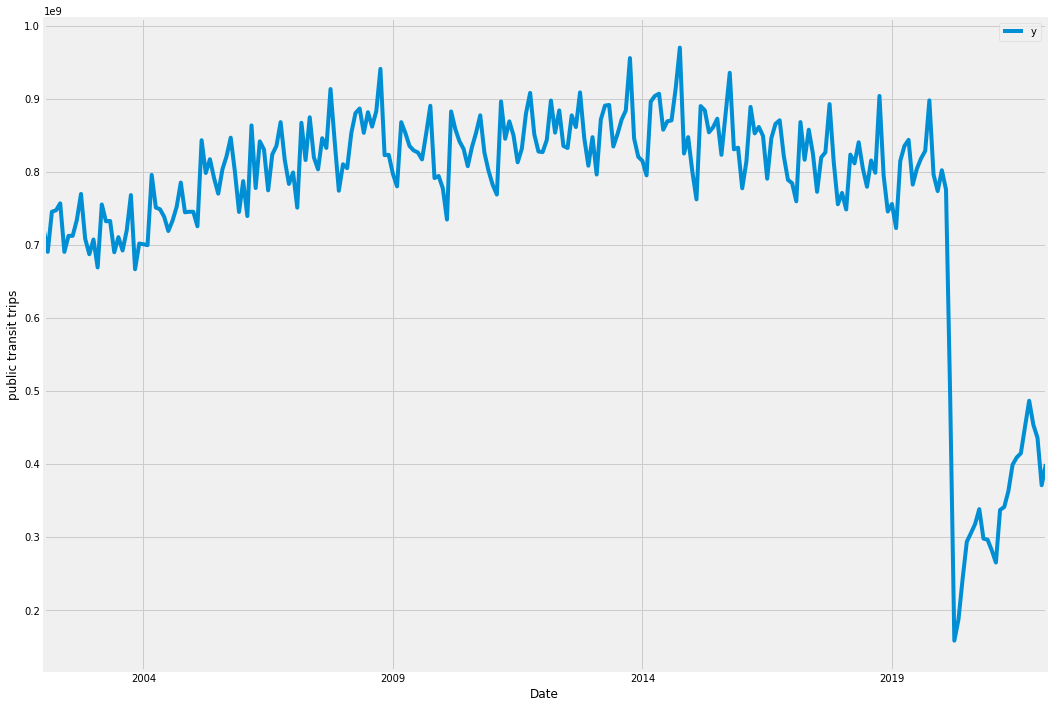

In [ ]:
## Master trips plot
ax = master.set_index('ds').plot(figsize=(16,12))
ax.set_ylabel('public transit trips')
ax.set_xlabel('Date')
plt.show()

In [ ]:
# Autocorrelation
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# autocorrelation factor
plot_acf(precovid['trips'], ax=plt.gca())
plt.show()

# partial autocorrelation factor
plot_pacf(precovid['trips'], ax=plt.gca())
plt.show

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


KeyError: ignored

In [ ]:
result = adfuller(precovid['trips'], autolag='AIC')

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

KeyError: ignored

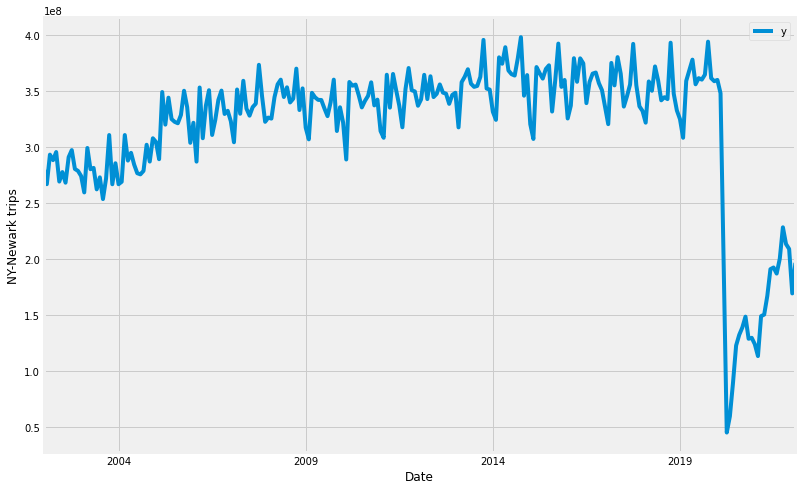

In [ ]:
## ny trips Plot
ny_precovid = ny[['ds','y']][:-26]
ny_precovid

ax = ny.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('NY-Newark trips')
ax.set_xlabel('Date')


plt.show()

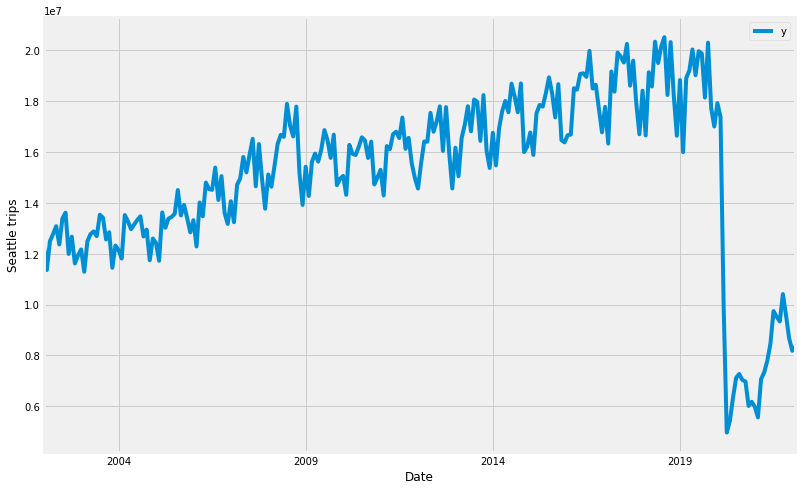

In [ ]:
## Seattle trips Plot
sea_precovid = sea[['ds','y']][:-26]
sea_precovid

ax = sea.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Seattle trips')
ax.set_xlabel('Date')


plt.show()

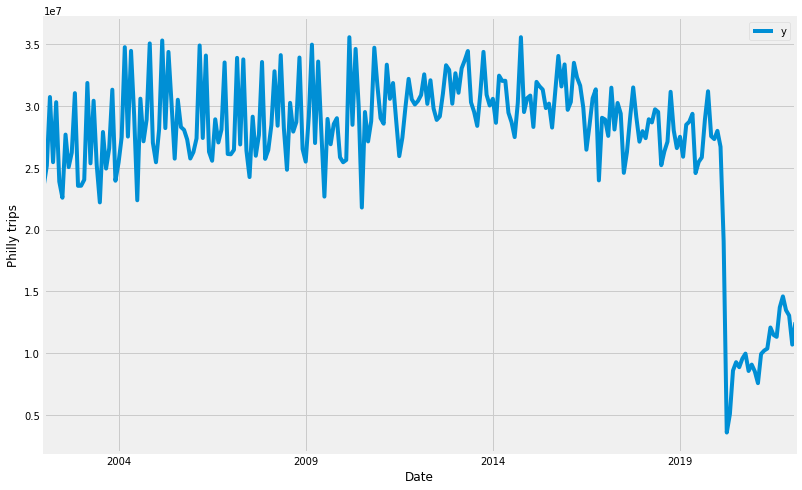

In [ ]:
## philidelphia trips plot
phi_precovid = phi[['ds','y']][:-26]
phi_precovid

ax = phi.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Philly trips')
ax.set_xlabel('Date')


plt.show()

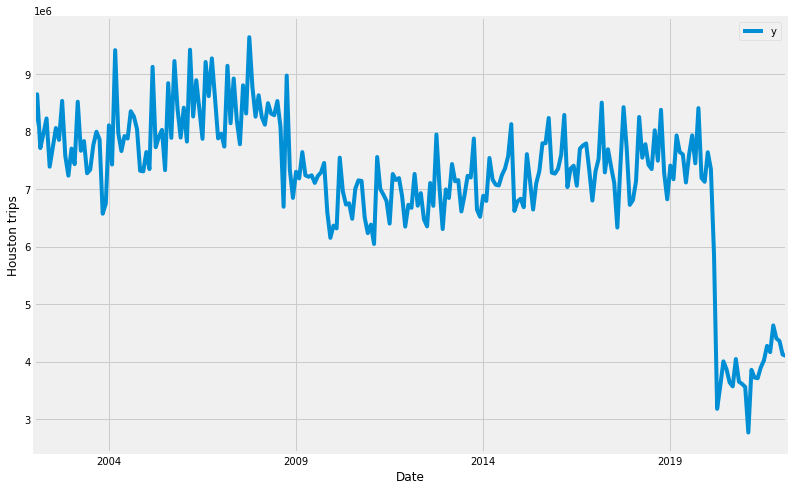

In [ ]:
## houston trips plot
hou_precovid = hou[['ds','y']][:-26]
hou_precovid

ax = hou.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Houston trips')
ax.set_xlabel('Date')


plt.show()

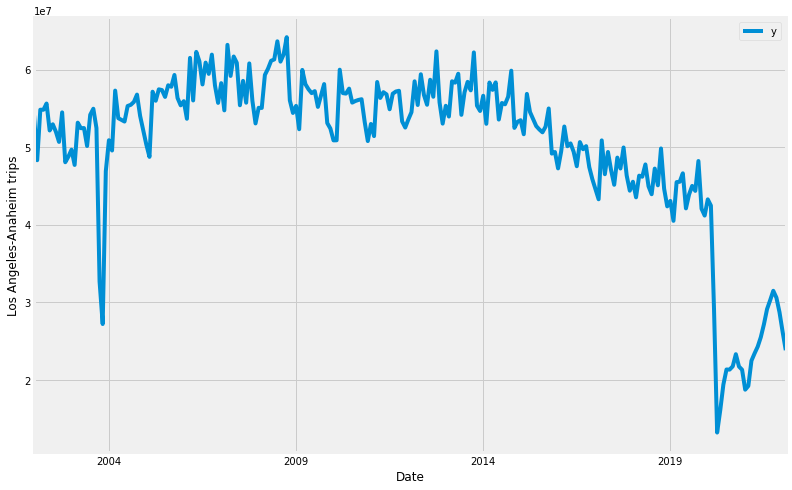

In [ ]:
## LA-Anaheim trips plot
la_precovid = la[['ds','y']][:-26]
la_precovid

ax = la.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Los Angeles-Anaheim trips')
ax.set_xlabel('Date')


plt.show()

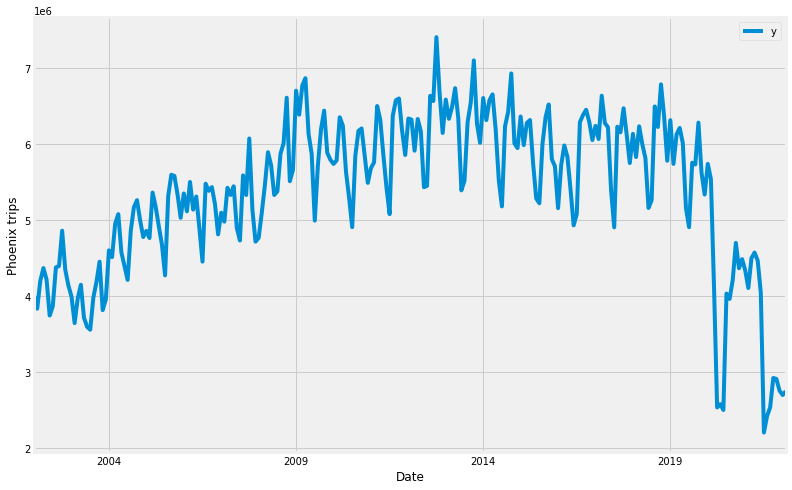

In [ ]:
## LA-Anaheim trips plot
phx_precovid = phx[['ds','y']][:-26]
phx_precovid

ax = phx.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Phoenix trips')
ax.set_xlabel('Date')


plt.show()

In [ ]:
## master Prophet Model
master_model = Prophet(interval_width=.95)
master_model.fit(precovid)

## Build out future dates for predictions
future_dates = master_model.make_future_dataframe(periods=128, freq='W')

# Use model to generate forecasts for future dates.
forecast = master_model.predict(future_dates)
print(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']][-20:])
master_model.plot(forecast,uncertainty=True)
plt.show()

plt.figure(figsize=(12,8))
plt.plot(forecast['ds'],forecast['yhat'],color='tab:orange')
plt.plot(master['ds'],master['y'],color = 'b')
plt.title('USA')
plt.ylabel('Public Transportation Trips')
plt.legend(['Predicted Ridership','Actual Ridership'])
plt.show()

NameError: ignored

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         trend          yhat    yhat_lower    yhat_upper
324 2022-01-02  3.552177e+08  3.595674e+08  3.375885e+08  3.837192e+08
325 2022-01-09  3.552137e+08  4.899631e+08  4.663375e+08  5.123308e+08
326 2022-01-16  3.552097e+08  5.387856e+08  5.174000e+08  5.601437e+08
327 2022-01-23  3.552057e+08  4.703722e+08  4.471766e+08  4.912974e+08
328 2022-01-30  3.552017e+08  3.522337e+08  3.303258e+08  3.740183e+08
329 2022-02-06  3.551977e+08  2.803026e+08  2.569861e+08  3.051053e+08
330 2022-02-13  3.551937e+08  2.887724e+08  2.666474e+08  3.088447e+08
331 2022-02-20  3.551897e+08  3.367827e+08  3.142662e+08  3.586803e+08
332 2022-02-27  3.551857e+08  3.686340e+08  3.469291e+08  3.921387e+08
333 2022-03-06  3.551817e+08  3.689818e+08  3.474382e+08  3.905999e+08
334 2022-03-13  3.551777e+08  3.589285e+08  3.377336e+08  3.808997e+08
335 2022-03-20  3.551737e+08  3.567529e+08  3.345029e+08  3.774732e+08
336 2022-03-27  3.551697e+08  3.590097e+08  3.369940e+08  3.808603e+08
337 20

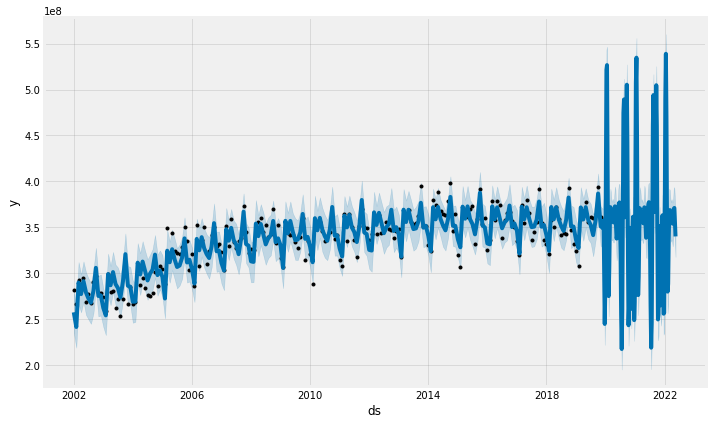

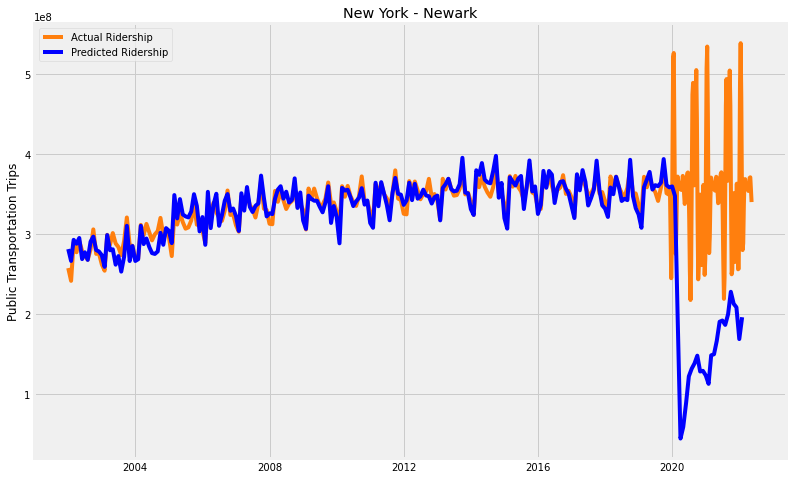

In [ ]:
## NY-Newark Prophet Model
NY_model = Prophet(interval_width=.95)
NY_model.fit(ny_precovid)

## Build out future dates for predictions
future_dates = NY_model.make_future_dataframe(periods=128, freq='W')

# Use model to generate forecasts for future dates.
forecast = NY_model.predict(future_dates)
print(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']][-20:])
NY_model.plot(forecast,uncertainty=True)
plt.show()

plt.figure(figsize=(12,8))
plt.plot(forecast['ds'],forecast['yhat'],color='tab:orange')
plt.plot(ny['ds'],ny['y'],color = 'b')
plt.title('New York - Newark')
plt.ylabel('Public Transportation Trips')
plt.legend(['Actual Ridership','Predicted Ridership'])
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         trend          yhat    yhat_lower    yhat_upper
324 2022-01-02  1.990427e+07  1.993613e+07  1.909647e+07  2.088173e+07
325 2022-01-09  1.991035e+07  2.383001e+07  2.280741e+07  2.477320e+07
326 2022-01-16  1.991644e+07  2.588886e+07  2.489149e+07  2.675829e+07
327 2022-01-23  1.992253e+07  2.433047e+07  2.340856e+07  2.526281e+07
328 2022-01-30  1.992862e+07  1.976744e+07  1.888527e+07  2.064709e+07
329 2022-02-06  1.993471e+07  1.517114e+07  1.425964e+07  1.618790e+07
330 2022-02-13  1.994080e+07  1.361339e+07  1.264331e+07  1.451821e+07
331 2022-02-20  1.994688e+07  1.570524e+07  1.477195e+07  1.664147e+07
332 2022-02-27  1.995297e+07  1.922146e+07  1.831305e+07  2.013756e+07
333 2022-03-06  1.995906e+07  2.130782e+07  2.047529e+07  2.225454e+07
334 2022-03-13  1.996515e+07  2.104028e+07  2.012813e+07  2.197946e+07
335 2022-03-20  1.997124e+07  1.982463e+07  1.883092e+07  2.077471e+07
336 2022-03-27  1.997732e+07  1.950756e+07  1.860514e+07  2.043523e+07
337 20

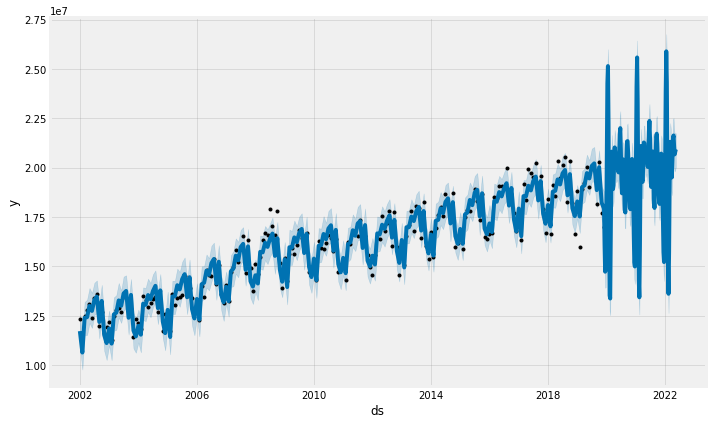

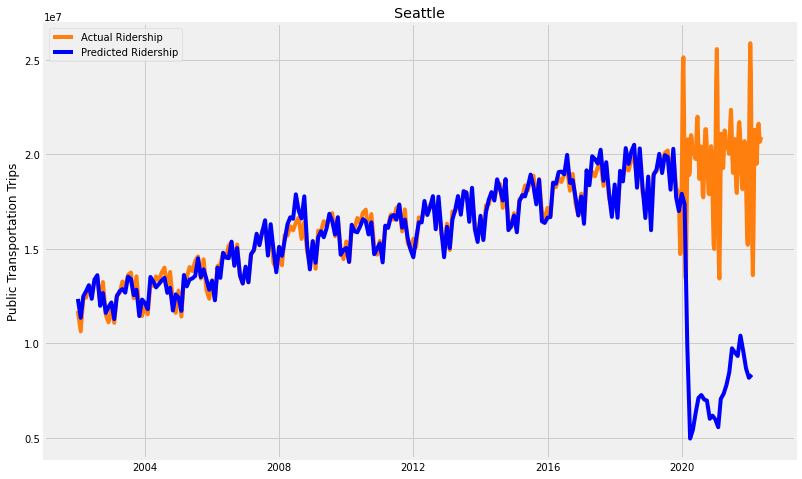

In [ ]:
## Seattle Prophet Model
SEA_model = Prophet(interval_width=.95)
SEA_model.fit(sea_precovid)

## Build out future dates for predictions
future_dates = SEA_model.make_future_dataframe(periods=128, freq='W')

# Use model to generate forecasts for future dates.
forecast = SEA_model.predict(future_dates)
print(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']][-20:])
SEA_model.plot(forecast,uncertainty=True)
plt.show()

plt.figure(figsize=(12,8))
plt.plot(forecast['ds'],forecast['yhat'],color='tab:orange')
plt.plot(sea['ds'],sea['y'],color = 'b')
plt.title('Seattle')
plt.ylabel('Public Transportation Trips')
plt.legend(['Actual Ridership','Predicted Ridership'])
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         trend          yhat    yhat_lower    yhat_upper
324 2022-01-02  2.639711e+07  2.508803e+07  2.178882e+07  2.912385e+07
325 2022-01-09  2.638578e+07  2.679710e+07  2.308300e+07  3.051861e+07
326 2022-01-16  2.637445e+07  2.815141e+07  2.465128e+07  3.166621e+07
327 2022-01-23  2.636312e+07  2.785232e+07  2.425751e+07  3.148363e+07
328 2022-01-30  2.635179e+07  2.579405e+07  2.209937e+07  2.947384e+07
329 2022-02-06  2.634046e+07  2.348454e+07  1.985968e+07  2.717233e+07
330 2022-02-13  2.632913e+07  2.297168e+07  1.940697e+07  2.618250e+07
331 2022-02-20  2.631779e+07  2.514192e+07  2.168095e+07  2.876823e+07
332 2022-02-27  2.630646e+07  2.893816e+07  2.521652e+07  3.261354e+07
333 2022-03-06  2.629513e+07  3.216676e+07  2.842445e+07  3.567949e+07
334 2022-03-13  2.628380e+07  3.308462e+07  2.930934e+07  3.676254e+07
335 2022-03-20  2.627247e+07  3.142684e+07  2.756980e+07  3.509174e+07
336 2022-03-27  2.626114e+07  2.831367e+07  2.457899e+07  3.199606e+07
337 20

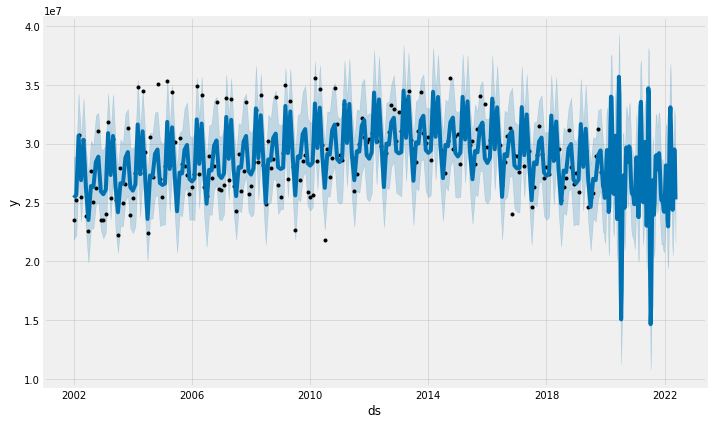

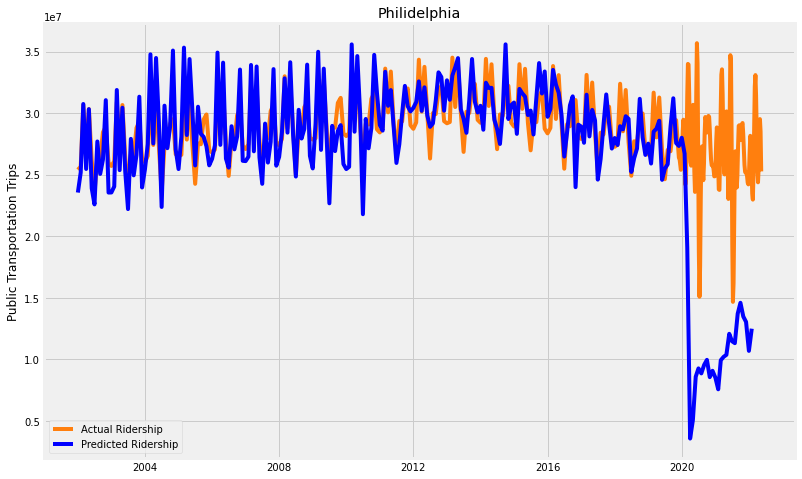

In [ ]:
## Philidelphia Prophet Model
PHI_model = Prophet(interval_width=.95)
PHI_model.fit(phi_precovid)

## Build out future dates for predictions
future_dates = PHI_model.make_future_dataframe(periods=128, freq='W')

# Use model to generate forecasts for future dates.
forecast = PHI_model.predict(future_dates)
print(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']][-20:])
PHI_model.plot(forecast,uncertainty=True)
plt.show()

plt.figure(figsize=(12,8))
plt.plot(forecast['ds'],forecast['yhat'],color='tab:orange')
plt.plot(phi['ds'],phi['y'],color = 'b')
plt.title('Philidelphia')
plt.ylabel('Public Transportation Trips')
plt.legend(['Actual Ridership','Predicted Ridership'])
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         trend          yhat    yhat_lower    yhat_upper
324 2022-01-02  7.926830e+06  7.513381e+06  6.764015e+06  8.245683e+06
325 2022-01-09  7.928784e+06  6.329484e+06  5.639081e+06  7.044961e+06
326 2022-01-16  7.930738e+06  6.218548e+06  5.378098e+06  6.952440e+06
327 2022-01-23  7.932692e+06  6.984720e+06  6.184011e+06  7.706850e+06
328 2022-01-30  7.934646e+06  7.596673e+06  6.761926e+06  8.267767e+06
329 2022-02-06  7.936601e+06  7.428458e+06  6.671984e+06  8.187644e+06
330 2022-02-13  7.938555e+06  6.921192e+06  6.207494e+06  7.663769e+06
331 2022-02-20  7.940509e+06  7.020697e+06  6.263779e+06  7.822857e+06
332 2022-02-27  7.942463e+06  8.103522e+06  7.349227e+06  8.823806e+06
333 2022-03-06  7.944417e+06  9.542258e+06  8.828150e+06  1.031449e+07
334 2022-03-13  7.946372e+06  1.028834e+07  9.591398e+06  1.107996e+07
335 2022-03-20  7.948326e+06  9.833133e+06  9.039395e+06  1.053214e+07
336 2022-03-27  7.950280e+06  8.641675e+06  7.891637e+06  9.372122e+06
337 20

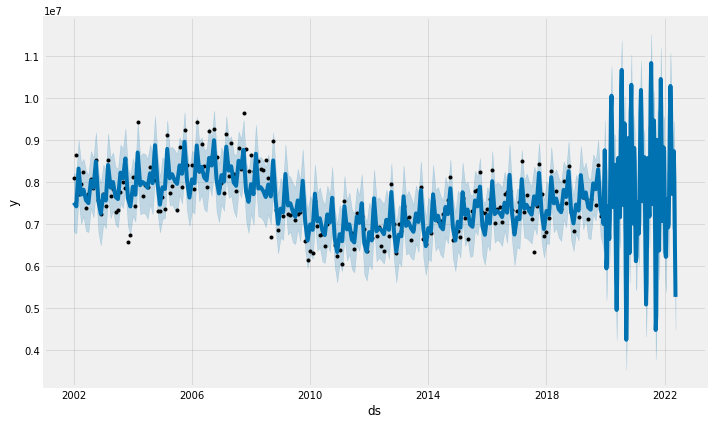

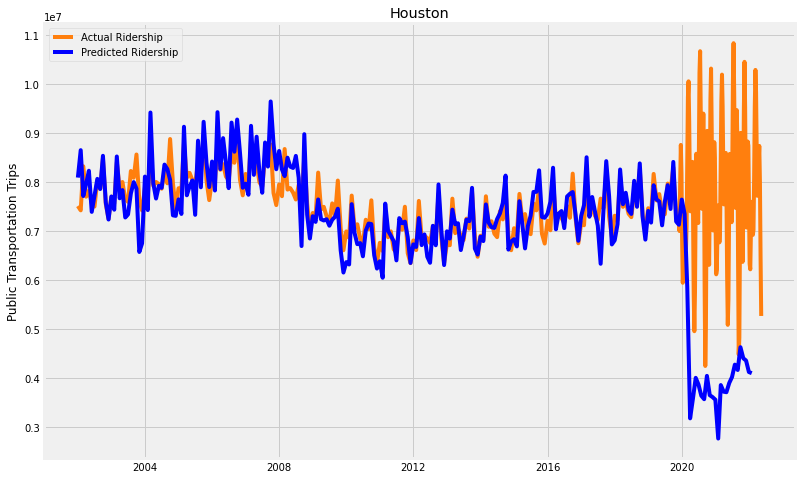

In [ ]:
## Houston Prophet Model
HOU_model = Prophet(interval_width=.95)
HOU_model.fit(hou_precovid)

## Build out future dates for predictions
future_dates = HOU_model.make_future_dataframe(periods=128, freq='W')

# Use model to generate forecasts for future dates.
forecast = HOU_model.predict(future_dates)
print(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']][-20:])
HOU_model.plot(forecast,uncertainty=True)
plt.show()

plt.figure(figsize=(12,8))
plt.plot(forecast['ds'],forecast['yhat'],color='tab:orange')
plt.plot(hou['ds'],hou['y'],color = 'b')
plt.title('Houston')
plt.ylabel('Public Transportation Trips')
plt.legend(['Actual Ridership','Predicted Ridership'])
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         trend          yhat    yhat_lower    yhat_upper
324 2022-01-02  3.860100e+07  3.559821e+07  3.016665e+07  4.099039e+07
325 2022-01-09  3.855974e+07  3.434362e+07  2.848051e+07  4.002146e+07
326 2022-01-16  3.851847e+07  4.067881e+07  3.540477e+07  4.582291e+07
327 2022-01-23  3.847721e+07  4.491503e+07  3.985209e+07  5.063780e+07
328 2022-01-30  3.843594e+07  3.813683e+07  3.255191e+07  4.336992e+07
329 2022-02-06  3.839468e+07  2.478473e+07  1.913161e+07  3.033824e+07
330 2022-02-13  3.835341e+07  1.834088e+07  1.280237e+07  2.357460e+07
331 2022-02-20  3.831215e+07  2.537056e+07  2.002160e+07  3.111370e+07
332 2022-02-27  3.827088e+07  3.789788e+07  3.190410e+07  4.361215e+07
333 2022-03-06  3.822962e+07  4.326668e+07  3.750314e+07  4.894938e+07
334 2022-03-13  3.818835e+07  3.874663e+07  3.305364e+07  4.431277e+07
335 2022-03-20  3.814709e+07  3.306077e+07  2.760687e+07  3.878386e+07
336 2022-03-27  3.810582e+07  3.426675e+07  2.881575e+07  3.970552e+07
337 20

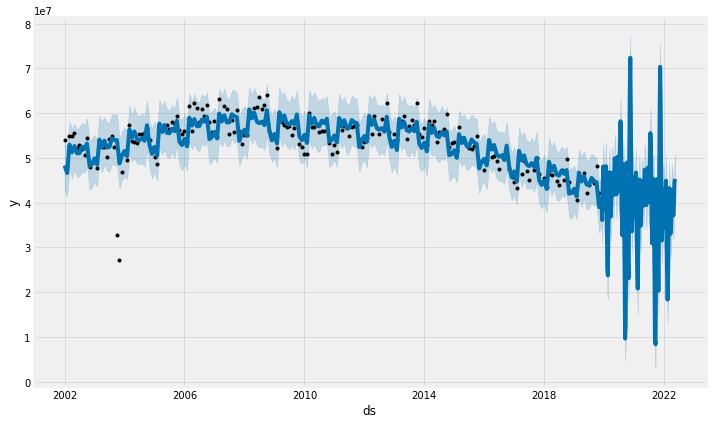

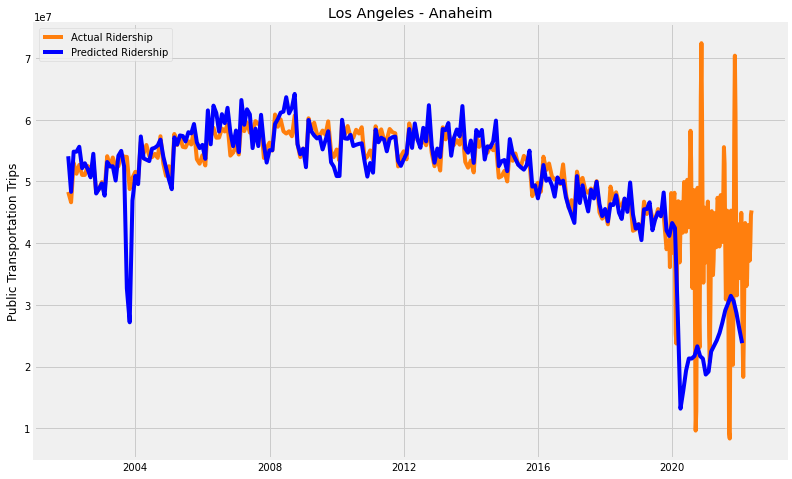

In [ ]:
## LA-Anaheim Prophet Model
LA_model = Prophet(interval_width=.95)
LA_model.fit(la_precovid)

## Build out future dates for predictions
future_dates = LA_model.make_future_dataframe(periods=128, freq='W')

# Use model to generate forecasts for future dates.
forecast = LA_model.predict(future_dates)
print(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']][-20:])
LA_model.plot(forecast,uncertainty=True)
plt.show()

plt.figure(figsize=(12,8))
plt.plot(forecast['ds'],forecast['yhat'],color='tab:orange')
plt.plot(la['ds'],la['y'],color = 'b')
plt.title('Los Angeles - Anaheim')
plt.ylabel('Public Transportation Trips')
plt.legend(['Actual Ridership','Predicted Ridership'])
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds         trend          yhat    yhat_lower    yhat_upper
324 2022-01-02  5.649604e+06  6.191816e+06  5.618811e+06  6.742874e+06
325 2022-01-09  5.648450e+06  8.421985e+06  7.899309e+06  9.003941e+06
326 2022-01-16  5.647297e+06  8.572240e+06  8.024432e+06  9.156933e+06
327 2022-01-23  5.646143e+06  6.945583e+06  6.390425e+06  7.488971e+06
328 2022-01-30  5.644989e+06  5.646260e+06  5.087753e+06  6.221443e+06
329 2022-02-06  5.643836e+06  6.199669e+06  5.669613e+06  6.737374e+06
330 2022-02-13  5.642682e+06  7.824931e+06  7.292552e+06  8.354748e+06
331 2022-02-20  5.641528e+06  8.352601e+06  7.769461e+06  8.901172e+06
332 2022-02-27  5.640375e+06  6.721264e+06  6.141109e+06  7.247116e+06
333 2022-03-06  5.639221e+06  4.185407e+06  3.626844e+06  4.757433e+06
334 2022-03-13  5.638067e+06  2.917299e+06  2.407250e+06  3.472230e+06
335 2022-03-20  5.636913e+06  3.693821e+06  3.158524e+06  4.242546e+06
336 2022-03-27  5.635760e+06  5.280691e+06  4.714038e+06  5.821233e+06
337 20

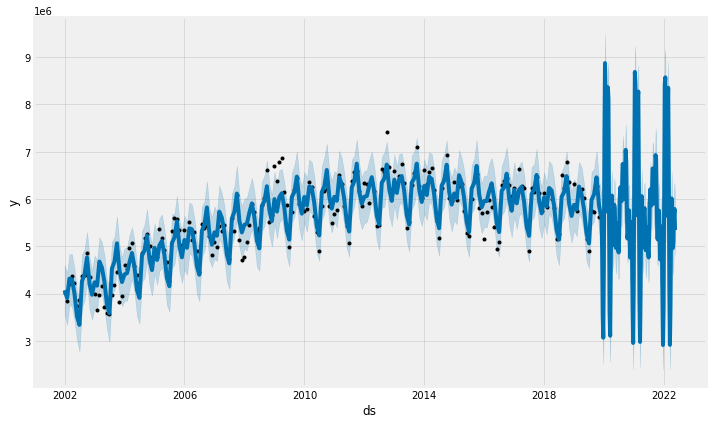

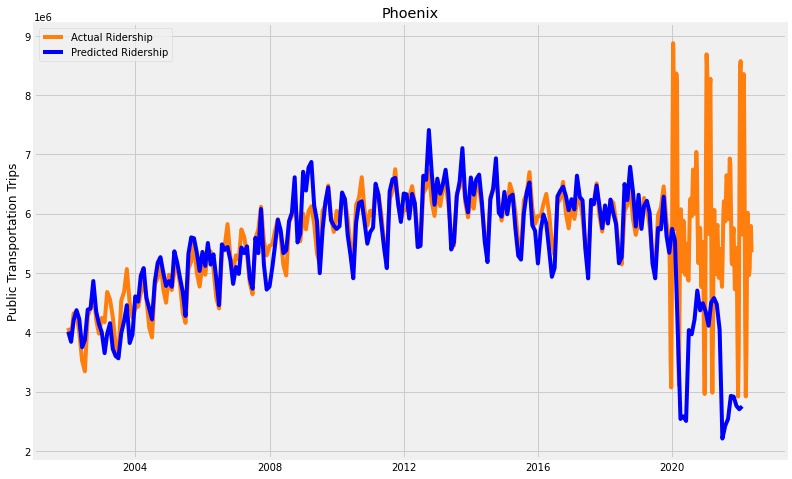

In [ ]:
## LA-Anaheim Prophet Model
PHX_model = Prophet(interval_width=.95)
PHX_model.fit(phx_precovid)

## Build out future dates for predictions
future_dates = PHX_model.make_future_dataframe(periods=128, freq='W')

# Use model to generate forecasts for future dates.
forecast = PHX_model.predict(future_dates)
print(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']][-20:])
PHX_model.plot(forecast,uncertainty=True)
plt.show()

plt.figure(figsize=(12,8))
plt.plot(forecast['ds'],forecast['yhat'],color='tab:orange')
plt.plot(phx['ds'],phx['y'],color = 'b')
plt.title('Phoenix')
plt.ylabel('Public Transportation Trips')
plt.legend(['Actual Ridership','Predicted Ridership'])
plt.show()